# Исследование данных о компьютерных играх

Исторические данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Данные до 2016 года.

**Описание данных**:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Цель проекта

Необходимо выполнить предобработку данных, провести исследовательский анализ, изучить предпочтения пользователей из разных регионов, а также проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

## Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
def display_info(data: pd.core.frame.DataFrame) -> None:
    '''
    Display main info about Pandas dataframe
    '''
    
    assert isinstance(data, pd.core.frame.DataFrame), 'Only pandas dataframe is allowed as input'
    
    display(data.sample(5))
    print('=' * 125)
    data.info()
    print('=' * 125)
    display(data.describe(include='all'))
    print('=' * 125)
    data.hist(bins=30, figsize=(12, 12))
    plt.show()
    print('=' * 125)
    print('Доля пропусков')
    print('=' * 125)
    display(data.isna().mean().sort_values(ascending=False))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3170,Lost Planet: Extreme Condition,PS3,2008.0,Shooter,0.31,0.17,0.07,0.08,67.0,7,T
4055,Medal of Honor,PC,2010.0,Shooter,0.20,0.23,0.00,0.06,72.0,6.4,M
8133,Lips: Party Classics,X360,2010.0,Misc,0.05,0.11,0.00,0.02,69.0,tbd,T
4579,2010 FIFA World Cup South Africa,Wii,2010.0,Sports,0.23,0.15,0.01,0.04,70.0,6.7,E
13351,Romance of the Three Kingdoms VI: Awakening of...,PS,1998.0,Strategy,0.03,0.02,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


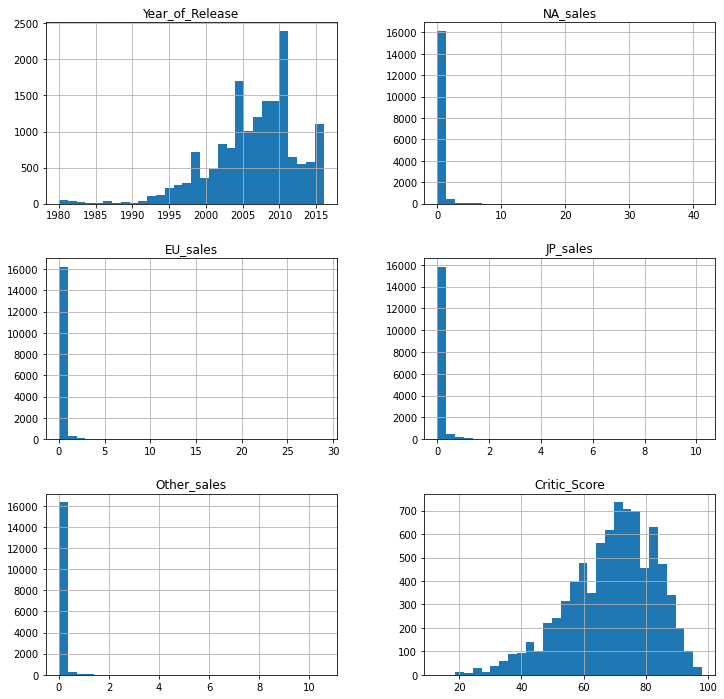

Доля пропусков


Critic_Score       0.513192
Rating             0.404786
User_Score         0.400897
Year_of_Release    0.016093
Name               0.000120
Genre              0.000120
Platform           0.000000
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
dtype: float64

In [4]:
display_info(df)

**Вывод:**

- Имеются пропуски в столбцах: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.
- Наименования столбцов не подходят под стандарты PEP8
- Тип данных отличается от подходящего в столбцах: `Year_of_Release`, `User_Score`.
- У 1/4 данных в столбцах о продажах нулевые значения.

## Предобработка данных

### Переименуем столбцы

In [5]:
df.columns = [name.lower() for name in df.columns]

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в нужные типы 

**1. year_of_release**

У столбца `year_of_release` тип данных `float64`, хотя он хранит информацию о годе выпуска игры (целочисленные значения), поэтому приведем его к типу `Int32` (данный тип также допускает наличие пропущенных значений).

In [7]:
df['year_of_release'] = df['year_of_release'].astype('Int32')

In [8]:
df['year_of_release'].dtype

Int32Dtype()

**2. user_score**

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Данный столбец хранит информацию о пользовательской оценке (числа с плавающей точкой), но из-за наличия строкового значения `'tbd'` имеет тип `object`. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. В данном случае она просто означает отсутсвие пользовательского рейтинга у игры на том ресурсе, с которого взяты эти данные, поэтому заменим `'tbd'` на `nan` значения и приведем столбец к типу `float32`.

In [10]:
df.loc[(df['user_score'] == 'tbd'), 'user_score'] = np.nan

In [11]:
df[df['user_score'] == 'tbd'].shape[0]

0

In [12]:
df['user_score'] = df['user_score'].astype('float32')

In [13]:
df['user_score'].dtype

dtype('float32')

### Проверим на наличе дубликатов

In [14]:
df.duplicated().sum()

0

**Явные дубликаты отсутствуют.**

Проверим наличие дубликатов в столбце `name`

In [15]:
df['name'].duplicated().sum()

5155

In [16]:
df['name'].value_counts().head(10)

Need for Speed: Most Wanted     12
LEGO Marvel Super Heroes         9
Madden NFL 07                    9
FIFA 14                          9
Ratatouille                      9
LEGO The Hobbit                  8
LEGO Harry Potter: Years 5-7     8
Lego Batman 3: Beyond Gotham     8
Angry Birds Star Wars            8
Cars                             8
Name: name, dtype: int64

In [17]:
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [18]:
df[df['name'] == 'FIFA 14']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4809,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
6871,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7875,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E


Все дубликаты в названиях игр связаны с выпуском на разные платформы, а у игры Need for Speed: Most Wanted еще и с изданием обновленной версии в 2012-2013 годах.

In [19]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [21]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [22]:
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Присутствуют дубликаты по 3 столбцам: название игры, платформа и год выхода. 

У двух игр пропущено имя, а также есть пропуски в других столбцах. Обработаем их в разделе о пропусках.

Madden NFL 13 с индексом 16230 имеет идетничные данные, за исключением продаж. Возможно, даннные о продажах взяты просто с другого ресурса (всего 100 тысяч в Европе и все). Добвим продажи к первому вхождению, а дубликат удалим.

In [23]:
df.loc[604, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = (
    df.loc[604, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] + 
    df.loc[16230, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
)
df = df.drop(index=16230).reset_index(drop=True)

In [24]:
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


### Обработаем пропуски

**1. name**

In [25]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Отсутсвие названий игр в данном случае нам не мешает, но у этих игр отсутсвует информация и о жанре, и о рейтингах, а также выпущены они достаточно давно. Поэтому можно эти две строки просто удалить.

In [26]:
df = df.dropna(subset=['name'])

**2. year_of_release**

In [27]:
df['year_of_release'].isna().sum()

269

Так как игры выпускались на разных платформах зачастую в один и тот же год или несильно позже, заполним пропуски, где это возможно, медианным значением года выпуска с округлением вверх. Оставшиеся строки с пропусками (у игры вообще нет информации о годе выпуска) придется удалить, так как без года выпуска их анализ не имеет смысла.

In [28]:
df['year_of_release'] = df['year_of_release'].fillna(
    np.ceil(df.groupby('name')['year_of_release'].transform('median'))
)
df['year_of_release'].isna().sum()

146

In [29]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'].isna().sum()

0

**3. critic_score, user_score**

In [30]:
print('critic_score:', df['critic_score'].isna().sum())
print('user_score:', df['user_score'].isna().sum())

critic_score: 8492
user_score: 9027


В данных столбцах пропуски могут отсутствовать в связи тем, что игра не выпускалась на определнных платформах или нет оценки для этой игры на определенном ресурсе или в регионе, правильно заполнить у нас их не получится (не Missingness Completely at Random), поэтому оставим их.

**4. rating**

In [31]:
df.rating.isna().sum()

6699

Для заполнения столбца с возрастным рейтингом можно снова сгруппировать игры по имени и заполнить тем же значением рейтинга, только с других платформ.

In [32]:
df['rating'] = df['rating'].fillna(
    df.groupby('name')['rating'].transform('first')
)
df.rating.isna().sum()

6262

Осталось 6262 пропуска. Заменим пропуски на значение 'Unknown', это будет маркером в дальнейшем анализе для нас, что значение возрастного рейтинга неизвестно.

In [33]:
df['rating'] = df['rating'].fillna('Unknown')
df.rating.isna().sum()

0

In [34]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown


### Добавим столбец с суммарными продажами по всем регионам

In [35]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


In [36]:
df[df['total_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16675,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,Unknown,0.0
16708,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,Unknown,0.0


У двух игр суммарные продажи нулевые. Удалим эти строки (аномальные значения).

In [37]:
df = df.query('total_sales > 0')

### Вывод

- Названия столбцов преобразованы в нижний регистр.
- В столбце `user_score` строковые значения `'tbd'` заменены на пропуски `NaN`
- Тип данных столбцов изменен:
    * `year_of_release` : `float64` на `Int32`
    * `user_score` : `object` на `float32`
- Обработаны пропуски:
    * `name` и `genre` : 2 строки без имени и жанра (а также отсуствовали рейтинги) удалены.
    * `year_of_release` : Где это возможно, для одной игры заполнены медианным значением среди выпуска на разных платформах, округленным вверх. Оставшиеся 146 строк удалены, так как без года выпуска их анализ затрудняется.
    * `critic_score`, `user_score` : Пропуски остались без обработки, так как корректно заполнить их не получается.
    * `rating` : Заполнены тем же возрастным рейтингом, что и на других платформах, оставшиеся прпоуски заменены на значение 'Unknown', выступающее маркером.
- Добавлен столбец с суммарными продажами по всем регионам `total_sales`
- Удалены 2 игры с суммарными нулевыми продажами.

## Исследовательский анализ данных

###  Cколько игр выпускалось в разные годы

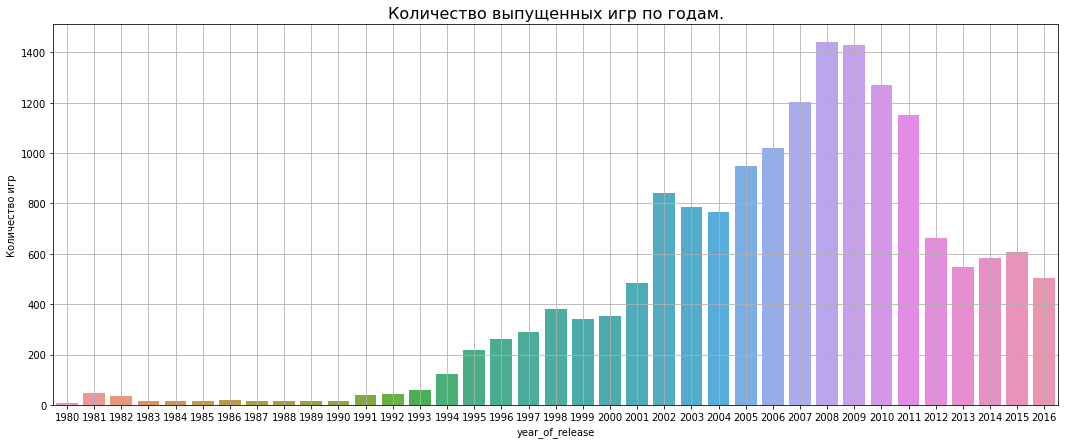

In [38]:
plt.figure(figsize=(18,7))

sns.countplot(x=df['year_of_release'])
plt.title('Количество выпущенных игр по годам.', fontsize=16)
plt.ylabel('Количество игр')
plt.grid()

plt.show()

Заметно, что большая часть игр выпущена после 1995 года. Построим график, отображающий, как увеличивается доля выпущенных игр по годам.

In [39]:
sbs = df['year_of_release'].value_counts().sort_index(ascending=False).to_frame()
sbs

,year_of_release
2016,502
2015,606
2014,582
2013,547
2012,661
2011,1153
2010,1269
2009,1430
2008,1439
2007,1202


In [40]:
sbs['percent'] = sbs['year_of_release'] / sbs['year_of_release'].sum()
sbs['percent'] = sbs['percent'].cumsum() # calculate cumulative sum

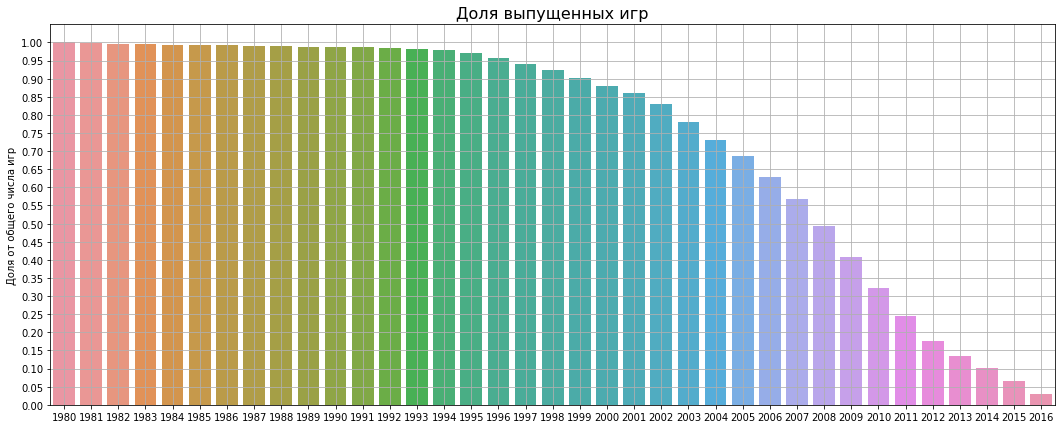

In [41]:
plt.figure(figsize=(18,7))

sns.barplot(data=sbs, x=sbs.index, y=sbs['percent'])
plt.title('Доля выпущенных игр', fontsize=16)
plt.ylabel('Доля от общего числа игр')
plt.yticks(np.arange(0, 1.05, 0.05))
plt.grid()

plt.show()

**95% игр были выпущены начиная с 1996 года.**

### Продажи по платформам

Посмотрим сначала на общее количество продаж по платформам.

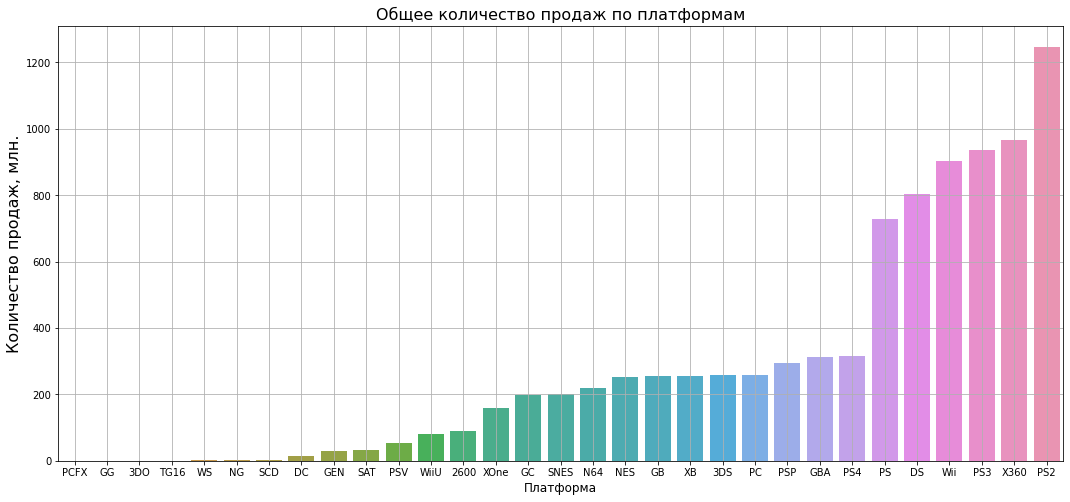

In [42]:
sbs = df.groupby('platform')['total_sales'].sum().sort_values()

plt.figure(figsize=(18, 8))

sns.barplot(x=sbs.index, y=sbs)
plt.title('Общее количество продаж по платформам', fontsize=16)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Количество продаж, млн.', fontsize=16)
plt.grid()

plt.show()

Исходя из графика, 5 самых прибыльных платформ за все время:
- PS2
- X360
- PS3
- Wii
- DS
- PS

Но для нашего анализа важно учитывать актуальность платформ. Для этого посмотрим подробнее на сроки жизни платформ.

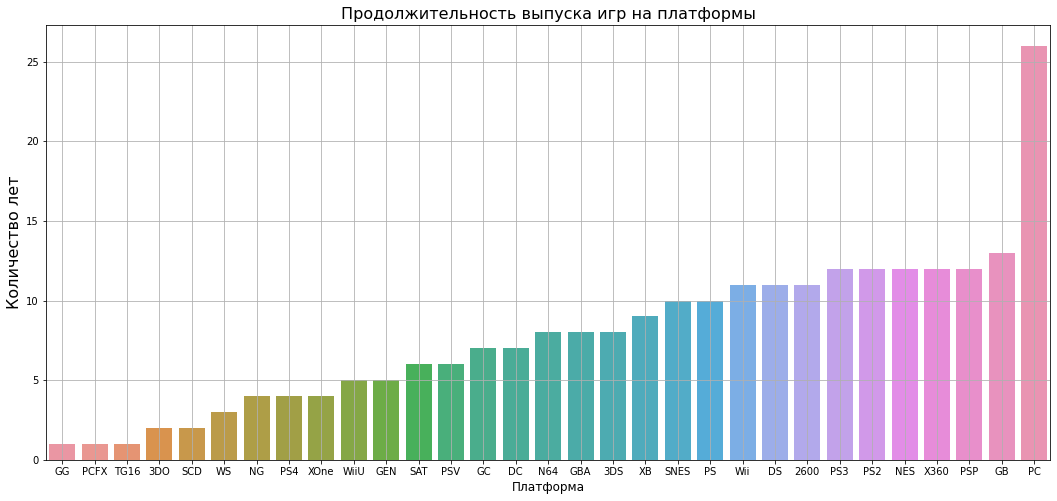

count    31.000000
mean      7.838710
std       5.112708
min       1.000000
25%       4.000000
50%       8.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

In [43]:
sbs = df.groupby('platform')['year_of_release'].nunique().sort_values()

plt.figure(figsize=(18, 8))

sns.barplot(x=sbs.index, y=sbs)
plt.title('Продолжительность выпуска игр на платформы', fontsize=16)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Количество лет', fontsize=16)
plt.grid()

plt.show()
sbs.describe()

Больше всего лет игры выпускают на PC, что закономерно. При этом в среднем (и по медиане) игры на отдельные платформы выпускаются 8 лет. 

Для того, чтобы окончательно определится с актуальными платформами и периодом, посмотрим для каждой платформы на последний год, в который выпускались для нее игры, а также на длительность периода выпуска игр и суммарное количество продаж по годам.

In [44]:
sbs = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
sbs['gap'] = sbs['max'] - sbs['min']
# save list of actual platforms (from 2015)
actual_pltfrm = sbs.query('max >= 2015').index

sbs.sort_values('max', ascending=False)

,min,max,gap
platform,,,
XOne,2013,2016,3
PS3,2005,2016,11
PS4,2013,2016,3
PC,1985,2016,31
PSV,2011,2016,5
Wii,2006,2016,10
WiiU,2012,2016,4
X360,2005,2016,11
3DS,2000,2016,16


Несмотря на огромное суммарное количество продаж PS2 и DS, последние игры выпущены для них в 2011 и 2013 году соответственно. Действительно, поддержка этих консолей прекратилась в 2013.

Получается актуальными платформами для нас являются:
- XOne
- PS3
- PS4
- PC
- PSV
- Wii
- WiiU
- X360
- 3DS
- PSP

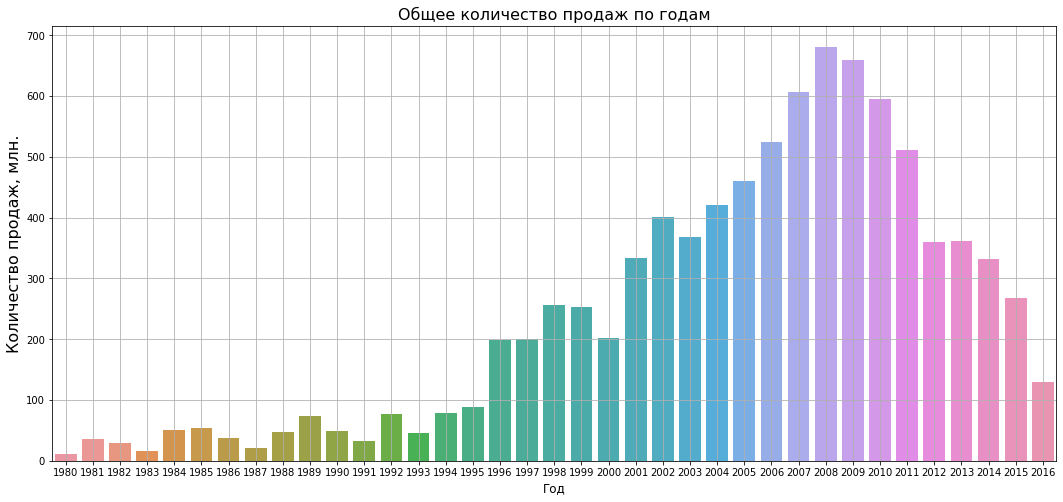

In [45]:
sbs = df.groupby('year_of_release')['total_sales'].sum().sort_values()

plt.figure(figsize=(18, 8))

sns.barplot(x=sbs.index, y=sbs)
plt.title('Общее количество продаж по годам', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество продаж, млн.', fontsize=16)
plt.grid()

plt.show()

Учитывая количество выпущенных игр по годам, количество продаж по годам, а также срок жизни самых популярных платформ и тот факт, что индустрия игр - быстроразвивающаяся и меняющаяся отрасль, для дальнейшего исследования будем использовать данные только с 2010 года. При этом будем принимать во внимание список актуальных платформ на 2016 год.

In [46]:
new_df = df.query('year_of_release >= 2010')
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,Unknown,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


###  Потенциально прибыльные платформы.

Для определения потенциально прибыльных платформ анализ будем проводить только среди актуальных, сохраненных в `actual_pltfrm`

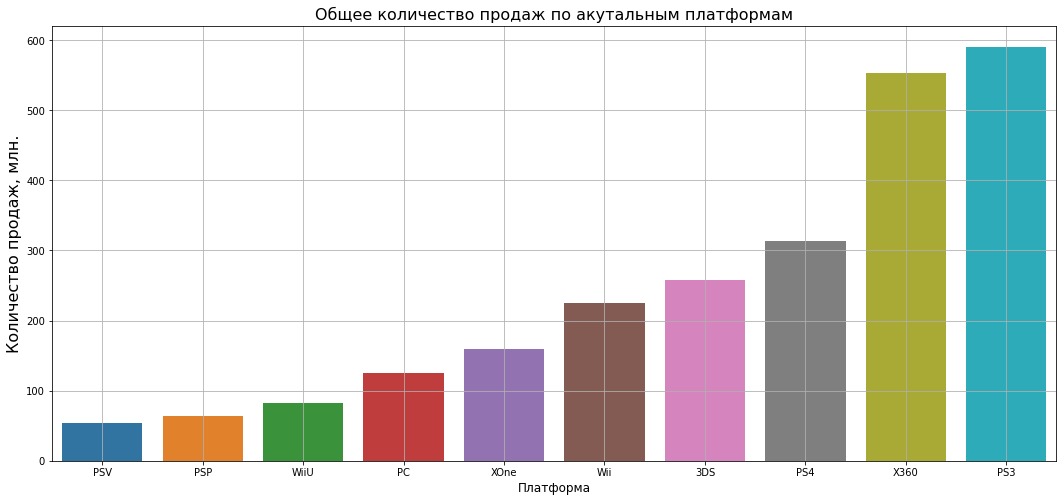

In [47]:
sbs = new_df.query('platform in @actual_pltfrm').groupby('platform')['total_sales'].sum().sort_values()

plt.figure(figsize=(18, 8))

sns.barplot(x=sbs.index, y=sbs)
plt.title('Общее количество продаж по акутальным платформам', fontsize=16)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Количество продаж, млн.', fontsize=16)
plt.grid()

plt.show()

Больше всего продаж на Wii, PS3 и X360.

Посмотрим также на прибыль по годам начиная с 2010 для каждой платформы в отдельности.

In [48]:
sbs = (
    new_df
    .query('platform in @actual_pltfrm')
    .groupby(['year_of_release', 'platform'])['total_sales'].sum()
    .reset_index()
    .sort_values(by=['year_of_release', 'total_sales'])
)
sbs

,year_of_release,platform,total_sales
0,2010,3DS,0.30
1,2010,PC,26.15
3,2010,PSP,35.04
4,2010,Wii,128.67
2,2010,PS3,142.96
5,2010,X360,170.55
10,2011,PSV,4.63
9,2011,PSP,17.82
7,2011,PC,35.16
11,2011,Wii,59.79


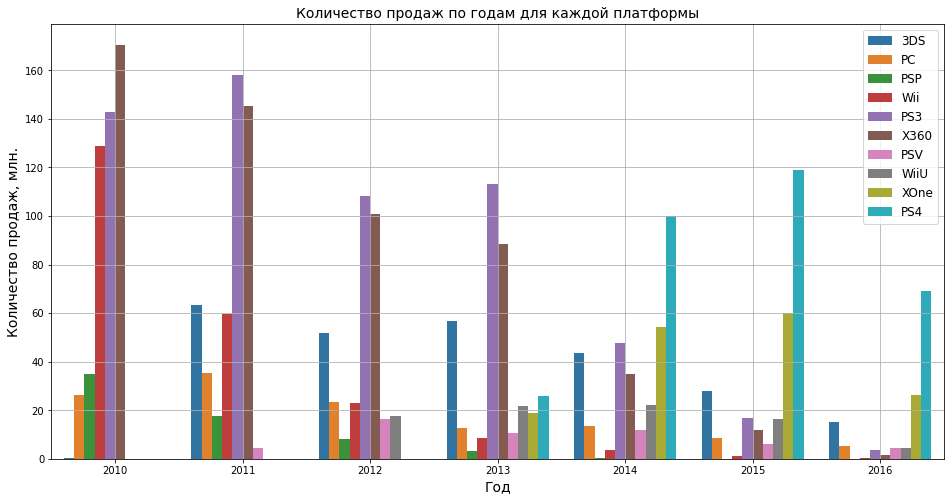

In [49]:
plt.figure(figsize=(16, 8))

sns.barplot(data=sbs, x='year_of_release', y='total_sales', hue='platform',)
plt.title('Количество продаж по годам для каждой платформы', fontsize=14)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество продаж, млн.', fontsize=14)
plt.legend(fontsize=12)
plt.grid()

plt.show()

Совсем другая ситуация. У большинства платформ тенденция к снижению количества продаж. Восходящий тренд заметен только у новых консолей: PS4 и XOne. Учитывая долговечность, длительный период жизни, стоит учесть также PC. Также у 3DS все еще достаточно большое количество продаж.

**В итоге, к потенциально прибыльным платформам стоит отнести PS4, XOne, PC и 3DS.**

### Глобальные продажи игр в разбивке по платформам

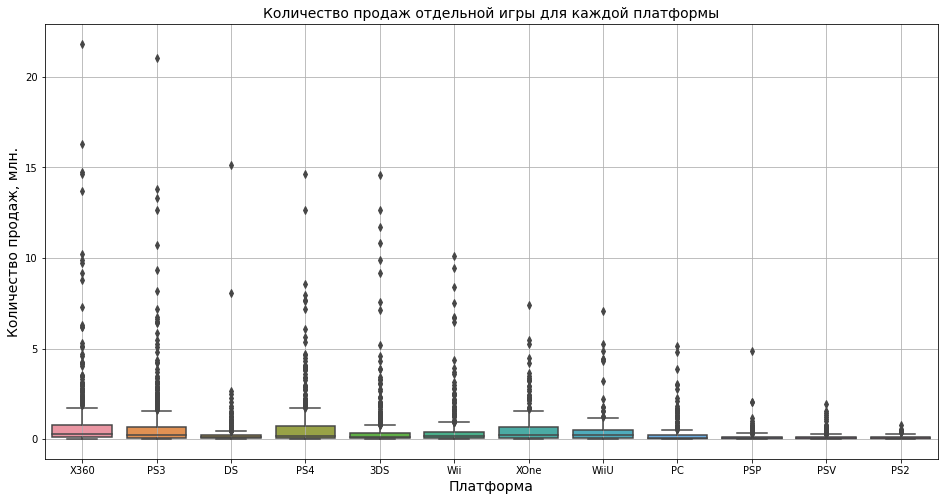

In [50]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=new_df, x='platform', y='total_sales')
plt.title('Количество продаж отдельной игры для каждой платформы', fontsize=14)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Количество продаж, млн.', fontsize=14)
plt.grid()

plt.show()

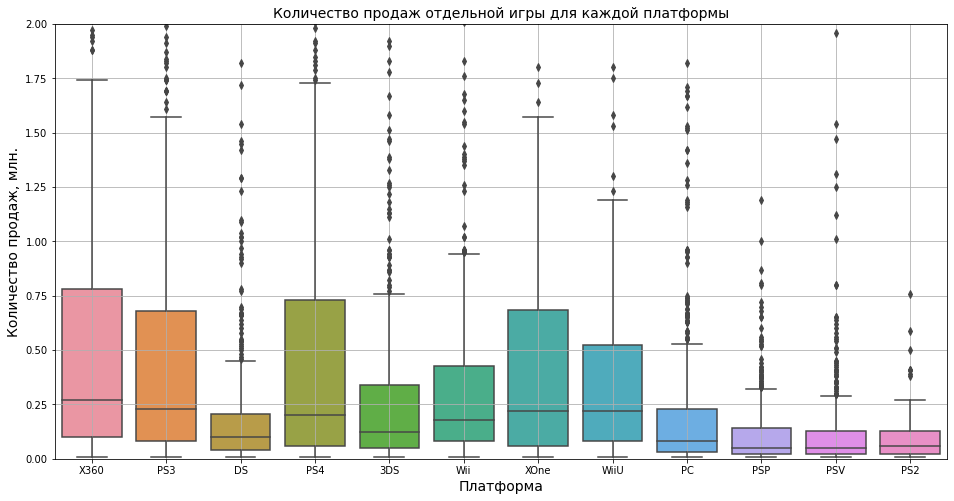

In [51]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=new_df, x='platform', y='total_sales')
plt.title('Количество продаж отдельной игры для каждой платформы', fontsize=14)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Количество продаж, млн.', fontsize=14)
plt.ylim(0, 2)
plt.grid()

plt.show()

**Большой разброс по количеству продаж отдельных игр, много выбросов.**

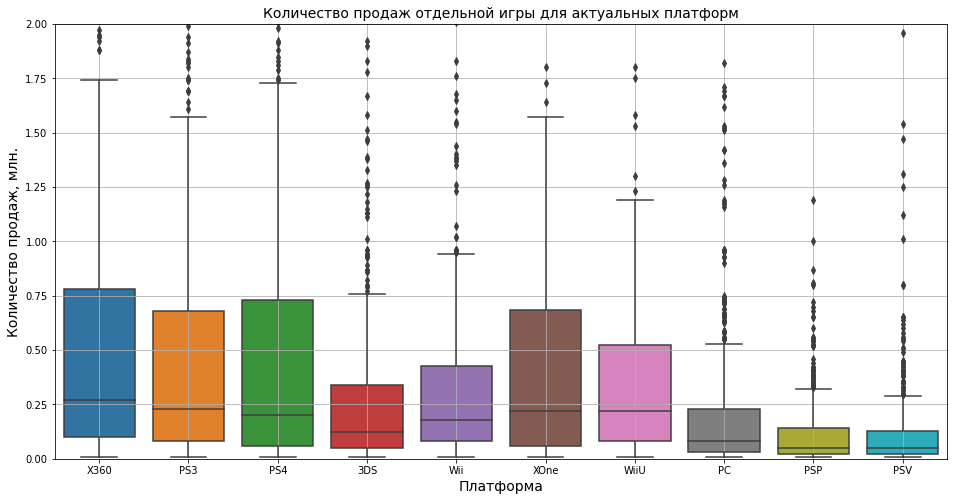

In [52]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=new_df.query('platform in @actual_pltfrm'), x='platform', y='total_sales')
plt.title('Количество продаж отдельной игры для актуальных платформ', fontsize=14)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Количество продаж, млн.', fontsize=14)
plt.ylim(0, 2)
plt.grid()

plt.show()

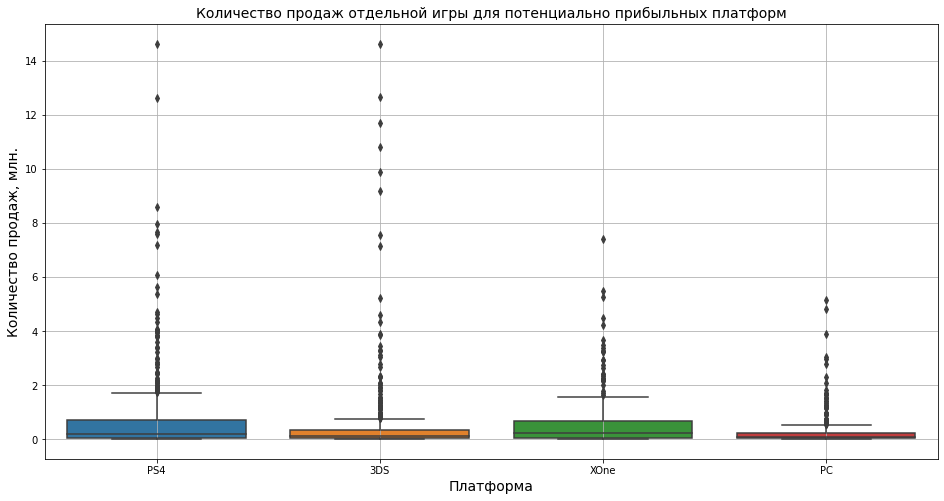

In [53]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=new_df.query('platform in ["PC", "XOne", "PS4", "3DS"]'), x='platform', y='total_sales')
plt.title('Количество продаж отдельной игры для потенциально прибыльных платформ', fontsize=14)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Количество продаж, млн.', fontsize=14)
plt.grid()

plt.show()

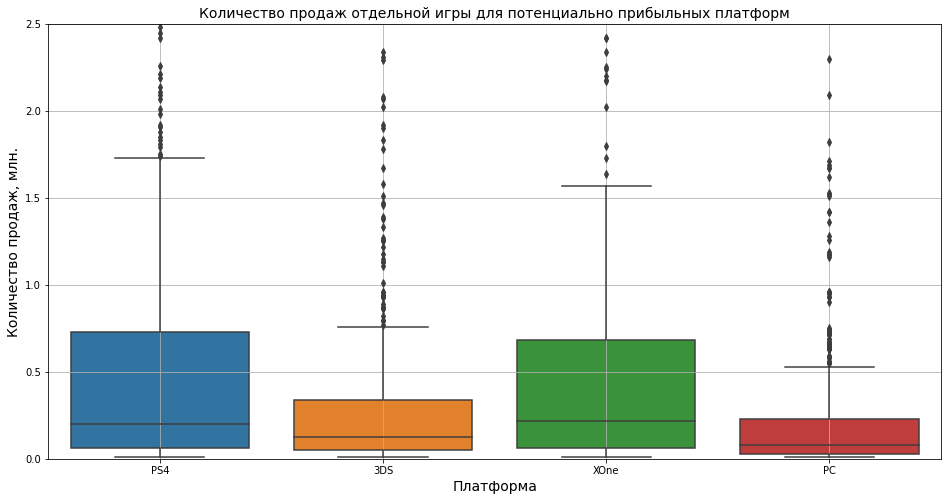

In [54]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=new_df.query('platform in ["PC", "XOne", "PS4", "3DS"]'), x='platform', y='total_sales')
plt.title('Количество продаж отдельной игры для потенциально прибыльных платформ', fontsize=14)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Количество продаж, млн.', fontsize=14)
plt.ylim(0, 2.5)
plt.grid()

plt.show()

In [55]:
new_df.query('platform in ["PC", "XOne", "PS4"] and total_sales > 2').groupby('platform')['total_sales'].count()

platform
PC       8
PS4     44
XOne    24
Name: total_sales, dtype: int64

**На PC игры в среднем продаются меньше, чем на консолях (что может быть связано с "пиратством"). Медианные значения продаж на всех платформах около 250 тысяч или даже ниже, при этом много выбросов значительно превосходящих эти значения. Скорее всего, большинство игр именно в таком количестве продаются (значения около медианы), но особенно популярные и культовые имеют объемы продаж в несколько раз превышающие медианные. Что касается потенциально прибыльных платформ, то больший разброс и большее количество выбросов имеют PS4 и 3DS (что является положительным показателем), но у 3DS медианные значения ниже, чем у PS4 и XOne.**

### Влияние на продажи внутри одной платформы отзывов пользователей и критиков.

Посмотрим на количество отзывов внутри платформ.

In [56]:
sbs = new_df.pivot_table(index='platform', values=['critic_score', 'user_score'], aggfunc=(['count']))
sbs.columns = ['critic_score', 'user_score']
sbs.sort_values(by=['critic_score', 'user_score'], ascending=False)

,critic_score,user_score
platform,,
PS3,481,544
X360,438,501
PC,359,383
PS4,252,257
XOne,169,182
3DS,167,172
Wii,128,125
PSV,119,142
WiiU,90,100


Для анализа будем использовать 5 платформ (PS3, X360, PC, PS4, XOne) с самым большим количеством отзывов (в них также входят 3 потенциально прибыльные платформы, определенные нами ранее).

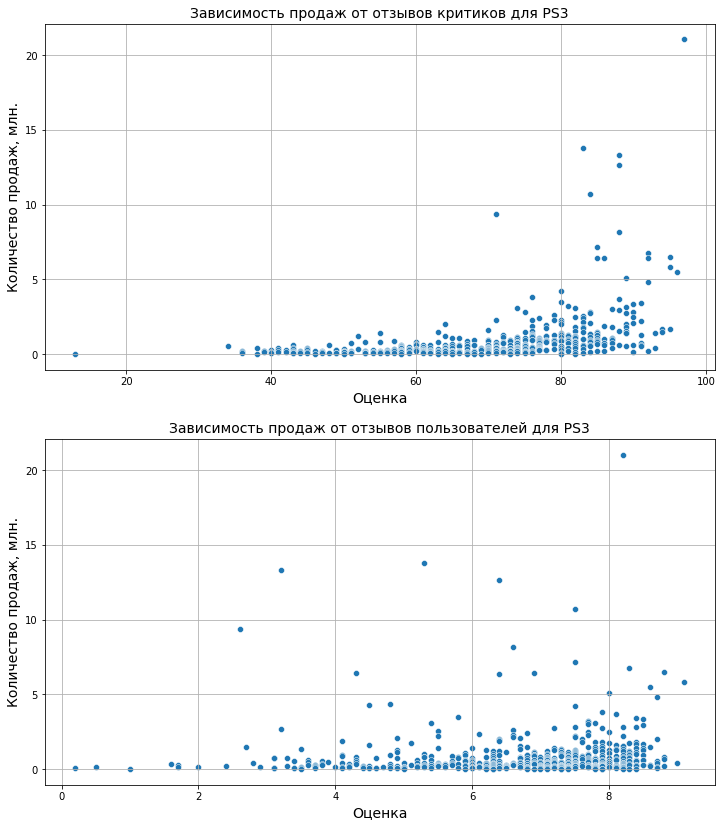

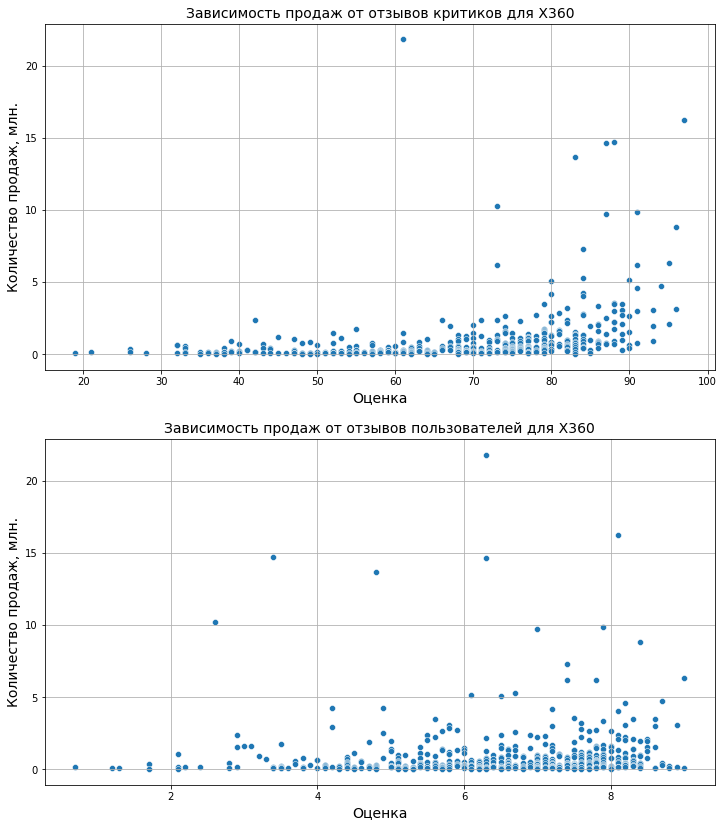

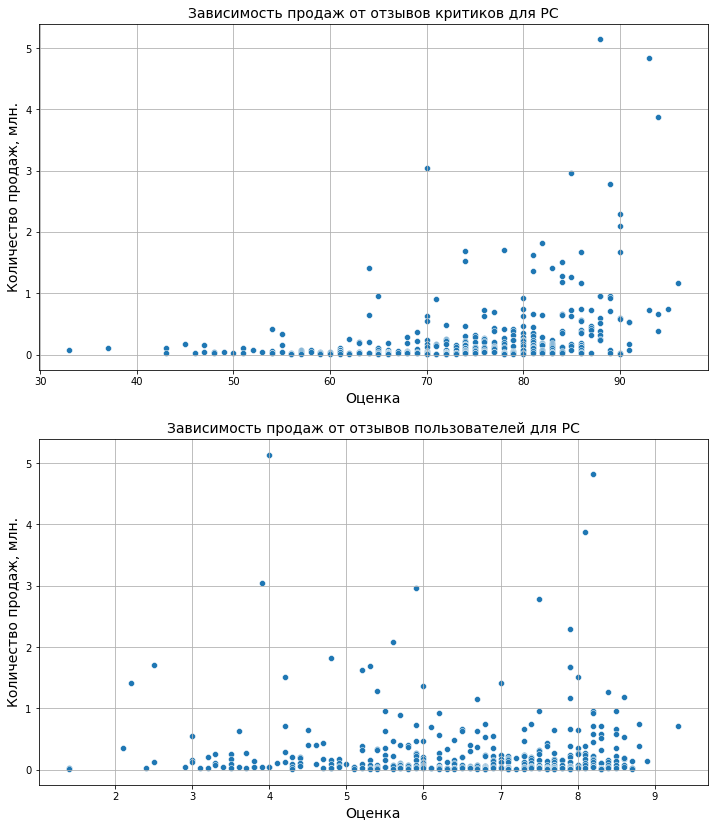

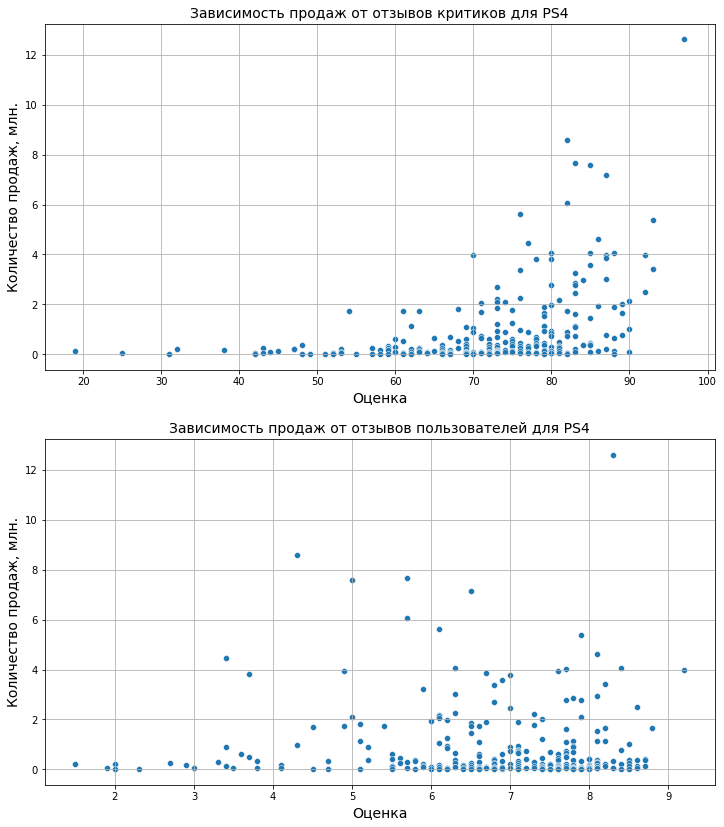

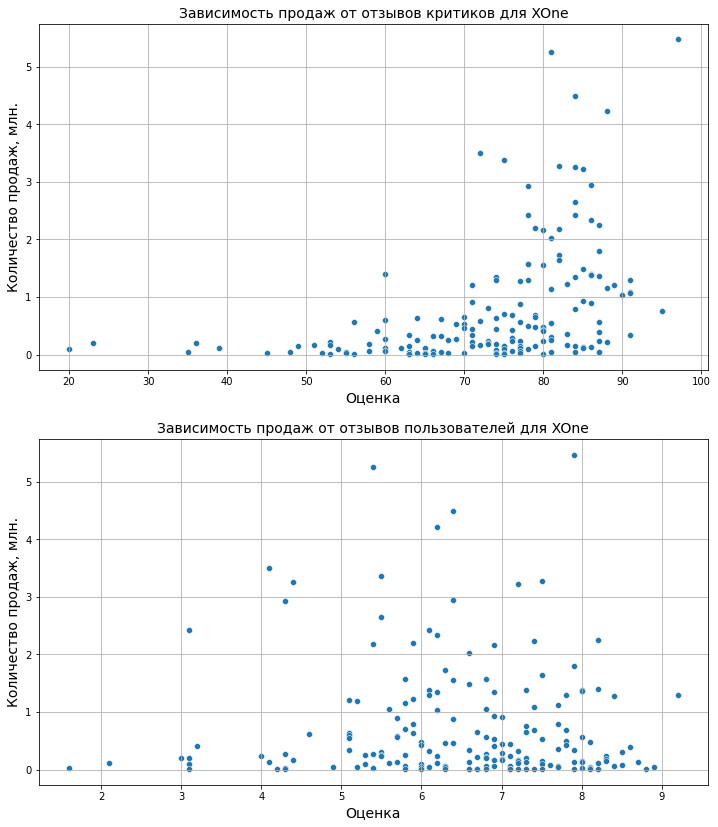

In [57]:
for name in ['PS3', 'X360', 'PC', 'PS4', 'XOne']:    
    plt.figure(figsize=(12, 14))

    plt.subplot(2, 1, 1)
    sns.scatterplot(data=new_df.query('platform == @name'), x='critic_score', y='total_sales')
    plt.title('Зависимость продаж от отзывов критиков для ' + name, fontsize=14)
    plt.xlabel('Оценка', fontsize=14)
    plt.ylabel('Количество продаж, млн.', fontsize=14)
    plt.grid()

    plt.subplot(2, 1, 2)
    sns.scatterplot(data=new_df.query('platform == @name'), x='user_score', y='total_sales')
    plt.title('Зависимость продаж от отзывов пользователей для ' + name, fontsize=14)
    plt.xlabel('Оценка', fontsize=14)
    plt.ylabel('Количество продаж, млн.', fontsize=14)
    plt.grid()

    plt.show()

In [58]:
for name in ['PS3', 'X360', 'PC', 'PS4', 'XOne']: 
    print(name)
    display(
        new_df.query('platform == @name')[['critic_score', 'user_score', 'total_sales']].corr()
    )

PS3


,critic_score,user_score,total_sales
critic_score,1.000000,0.594402,0.401889
user_score,0.594402,1.000000,0.062158
total_sales,0.401889,0.062158,1.000000


X360


,critic_score,user_score,total_sales
critic_score,1.000000,0.597772,0.338472
user_score,0.597772,1.000000,0.064213
total_sales,0.338472,0.064213,1.000000


PC


,critic_score,user_score,total_sales
critic_score,1.000000,0.478382,0.337270
user_score,0.478382,1.000000,-0.016365
total_sales,0.337270,-0.016365,1.000000


PS4


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


XOne


,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


**Общая корреляция между отзывами и количеством продаж прямая, но очень слабая (а для 3 потенциально прибыльных платформ даже слегка обратная, но выборка маленькая), игры с выдающимися продажами имеют как высокие оценки, так и средние. Корреляция между отзывами критиков и пользователей сильнее, на среднем уровне. Учитывая все предыдущие выводы, данное заключение, вероятно, можно интерполировать и на другие платформы.**

### Анализ жанров

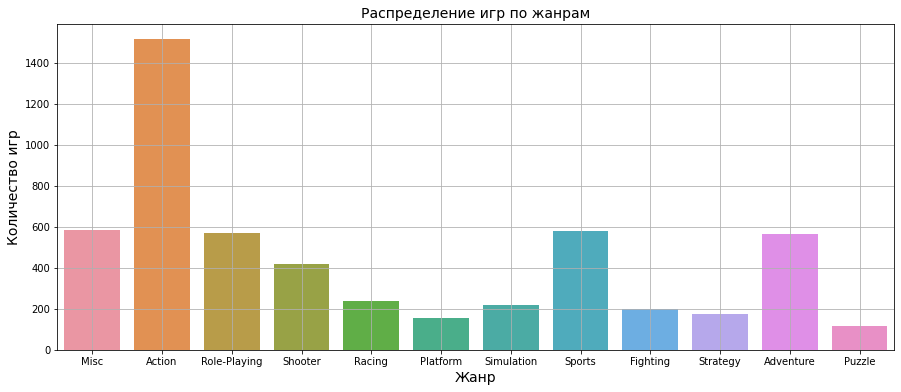

In [59]:
plt.figure(figsize=(15, 6))

sns.countplot(data=new_df, x='genre')
plt.title('Распределение игр по жанрам', fontsize=14)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.grid()

plt.show()

In [60]:
new_df['genre'].value_counts()

Action          1514
Misc             583
Sports           577
Role-Playing     569
Adventure        563
Shooter          417
Racing           237
Simulation       218
Fighting         199
Strategy         173
Platform         153
Puzzle           117
Name: genre, dtype: int64

Больше всего игр в жанрах Action и Sports.

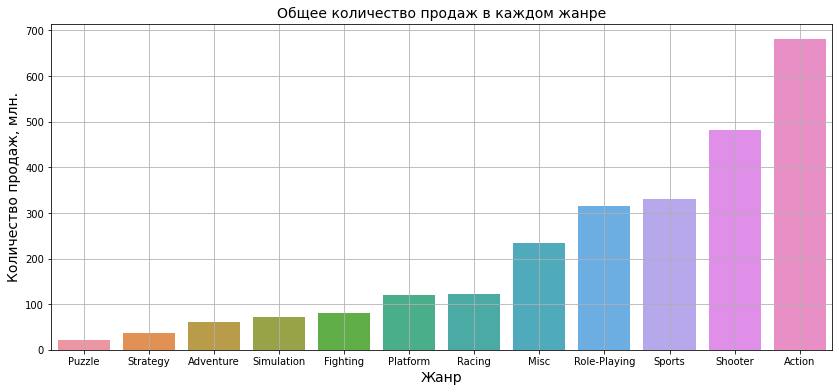

In [61]:
sbs = new_df.groupby('genre')['total_sales'].sum().sort_values()

plt.figure(figsize=(14, 6))

sns.barplot(x=sbs.index, y=sbs)
plt.title('Общее количество продаж в каждом жанре', fontsize=14)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Количество продаж, млн.', fontsize=14)
plt.grid()

plt.show()

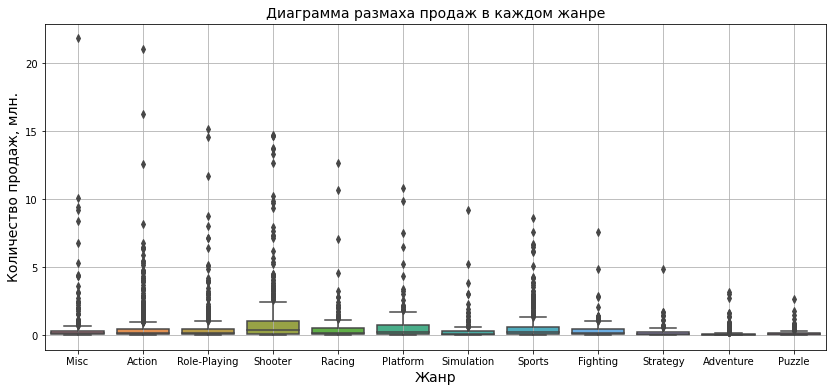

In [62]:
plt.figure(figsize=(14, 6))

sns.boxplot(data=new_df, x='genre', y='total_sales')
plt.title('Диаграмма размаха продаж в каждом жанре', fontsize=14)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Количество продаж, млн.', fontsize=14)
plt.grid()

plt.show()

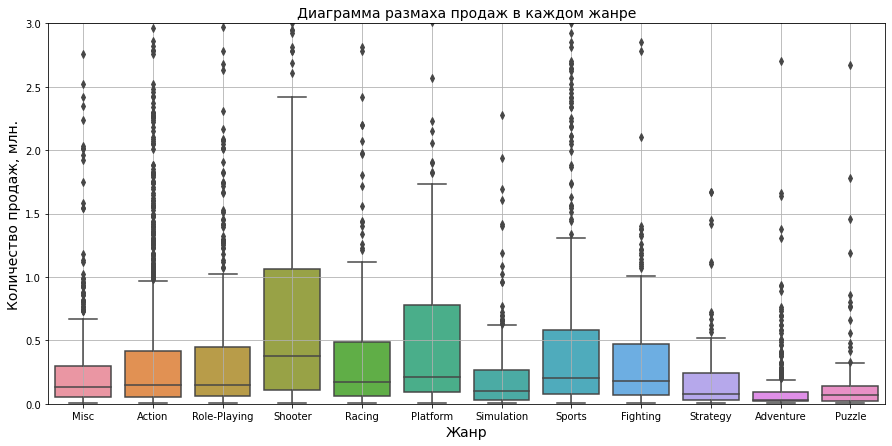

In [63]:
plt.figure(figsize=(15, 7))

sns.boxplot(data=new_df, x='genre', y='total_sales')
plt.title('Диаграмма размаха продаж в каждом жанре', fontsize=14)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Количество продаж, млн.', fontsize=14)
plt.ylim(0, 3)
plt.grid()

plt.show()

In [64]:
new_df.query('total_sales >= 1.5').groupby('genre')['total_sales'].count()

genre
Action          94
Adventure        5
Fighting         5
Misc            27
Platform        23
Puzzle           2
Racing          16
Role-Playing    46
Shooter         82
Simulation       9
Sports          56
Strategy         3
Name: total_sales, dtype: int64

**Больше всего общее количество продаж среди игр с жанрами Action, Sports и Shooter. Хуже всего продаются Strategy и Puzzle. Но если смотреть на медианные значения, то в тройке лидиров вместо жанра Action появляется Platform.**

### Вывод

- 95 % игр выпущены в период с 1996 по 2016 год
- Срок жизни платформ в среднем 8 лет, при этом самой долгоживущей платформой является PC.
- Платформа с самым большим общим количеством продаж игр за все время - PS2.
- Потенциально самые прибыльные и выгодные платформы на 2017 год - PS4, XOne, PC и 3DS.
- Медианные значения продаж на всех платформах около 250 тысяч или даже ниже, при этом много выбросов значительно превосходящих эти значения.
- Корреляция между отзывами и количеством продаж слабая, при этом игры с выдающимися продажами имеют как высокие оценки, так и средние.
- Жанрами с самым большим общим количеством продаж являются Shooter, Sports, и Action. По медианным значениям продаж в тройке лидеров: Shooter, Platform и Sports.

## Портрет пользователя каждого региона

Напишем небольшую функцию, которая будет отображать ТОПы по регионам в разных столбцах.

In [65]:
def region_top(col: str, top=9) -> None:
    for region in ['na_sales', 'eu_sales', 'jp_sales']:
        sbs = (
            new_df.groupby(col)[region].sum()
            .sort_values(ascending=False)
            .head(top)
            .to_frame()
        )
        sbs.loc['total'] = sbs[region].sum()
        sbs['percent'] = sbs[region] / sbs.loc['total', region]
        display(sbs)

### Самые популярные платформы (топ-5).

In [66]:
region_top('platform', 5)

,na_sales,percent
platform,,
X360,335.93,0.377051
PS3,230.47,0.258682
Wii,122.68,0.137697
PS4,108.74,0.122051
XOne,93.12,0.104519
total,890.94,1.000000


,eu_sales,percent
platform,,
PS3,214.74,0.326864
X360,164.29,0.250072
PS4,141.09,0.214759
PC,70.50,0.107311
Wii,66.35,0.100994
total,656.97,1.000000


,jp_sales,percent
platform,,
3DS,100.62,0.399032
PS3,59.36,0.235406
PSP,42.44,0.168306
DS,27.90,0.110644
PSV,21.84,0.086612
total,252.16,1.000000


В Северной Америке примерно на 25% больше продажи игр (по 5 самым популярным платформам), чем в Европе, и почти в 4 раза больше, чем в Японии. Это свидетельствует о большей популярности там игр, а также является следствием того, что множество разработчиков игр именно из Северной Америки.

### Самые популярные жанры (топ-5).

In [67]:
region_top('genre', 5)

,na_sales,percent
genre,,
Action,294.26,0.317700
Shooter,238.50,0.257498
Sports,157.49,0.170035
Misc,123.92,0.133791
Role-Playing,112.05,0.120976
total,926.22,1.000000


,eu_sales,percent
genre,,
Action,236.70,0.354325
Shooter,172.57,0.258327
Sports,117.09,0.175277
Role-Playing,75.48,0.112989
Misc,66.19,0.099082
total,668.03,1.000000


,jp_sales,percent
genre,,
Role-Playing,103.59,0.446855
Action,72.21,0.311492
Misc,24.54,0.105858
Platform,15.81,0.068199
Adventure,15.67,0.067596
total,231.82,1.000000


Первые три места по жанрам в Северной Америке и Европе полностью совпадают, а вот в Японии больше всего любят Role-Playing. При этом в Японии вообще не популярен жанры Shooter и Sports, зато присутсвуют Platform и Adventure. Сходство между Северной Америкой и Европой может быть связано с похожими культурами, а вот в Японии культура и менталитет совершенно другие.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [68]:
region_top('rating')

,na_sales,percent
rating,,
M,396.19,0.348458
E,277.26,0.243857
T,167.86,0.147637
E10+,165.29,0.145376
Unknown,128.74,0.113230
EC,1.64,0.001442
RP,0.00,0.000000
total,1136.98,1.000000


,eu_sales,percent
rating,,
M,307.00,0.362918
E,200.68,0.237233
T,118.83,0.140474
Unknown,114.82,0.135734
E10+,104.56,0.123605
RP,0.03,0.000035
EC,0.00,0.000000
total,845.92,1.000000


,jp_sales,percent
rating,,
Unknown,162.81,0.532947
E,48.81,0.159776
T,47.96,0.156994
M,32.30,0.105732
E10+,13.61,0.044551
EC,0.00,0.000000
RP,0.00,0.000000
total,305.49,1.000000


В Северной Америке и Европе по продажам лидируют игры с возрастным рейтингом M, E, T, а вот в Японии больше половины продаж приходится на игры с неизвестным рейтингом (у них нет рейтинга от органищации ESRB). Это еще раз подтверждает, что вкусы игроков в Северной Америке и Евпропе схожи, а вот в Японии они сильно отличаются.

### Вывод

- В Северной Америке игры в целом популярнее, чем в двух других регионах.
- Предпочтения в жанрах у игроков из Северной Америки и Европы похожи, а вот у Японии отличаются.
- Различия по продажам в зависимости от возрастного рейтинга у регионов минимальные, незначительные.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC *одинаковые*.

**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC *разные*.

**Уровень значимости:** 0.01

В данном случае воспользуемся методом st.ttest_ind, так как выборки независимые.

In [69]:
result = st.ttest_ind(
    new_df.query('platform == "XOne"')['user_score'].dropna(),
    new_df.query('platform == "PC"')['user_score'].dropna(),
)
alpha = 0.01
print('p-value =', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value = 0.9540148351578374
Не получилось отвергнуть нулевую гипотезу


In [70]:
print('Средние пользовательские рейтинги Xbox One:',
      new_df.query('platform == "XOne"')['user_score'].mean())
print('Средние пользовательские рейтинги PC:',
      new_df.query('platform == "PC"')['user_score'].mean())

Средние пользовательские рейтинги Xbox One: 6.5214286
Средние пользовательские рейтинги PC: 6.5292425


Полученное значение p-value значительно больше заданного уровня значимости (95% !), поэтому отвергнуть нулевую гипотезу не получилось. Есть основания говорить, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports разные.

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports *одинаковые*.

**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports *разные*.

**Уровень значимости:** 0.01

В данном случае тоже воспользуемся методом st.ttest_ind, так как выборки независимые.

In [71]:
result = st.ttest_ind(
    new_df.query('genre == "Action"')['user_score'].dropna(),
    new_df.query('genre == "Sports"')['user_score'].dropna(),
)
alpha = 0.01
print('p-value =', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value = 2.6057623914928274e-19
Отвергаем нулевую гипотезу


In [72]:
print('Средние пользовательские рейтинги Action:',
      new_df.query('genre == "Action"')['user_score'].mean())
print('Средние пользовательские рейтинги Sports:',
      new_df.query('genre == "Sports"')['user_score'].mean())

Средние пользовательские рейтинги Action: 6.78976
Средние пользовательские рейтинги Sports: 5.9012694


Полученное значение p-value ниже заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

1. **Целью работы являлось:**
   - Предобработка и анализ данных из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах.
   - Изучение предпочтений пользователей в отдельных регионах.
   - Проверка гипотез.

Входные данные: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

2. **При работе с данными были выявлены следующие проблемы:**
   * Наименования столбцов не подходят под стандарты PEP8 - переведены в нижний регистр.
   * Тип данных отличается от подходящего в столбцах: `year_of_release`, `user_score` - приведены к типу `Int32` и `float32` соответственно.
   * пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
       - `name` и `genre` : 2 строки без имени и жанра (а также отсуствовали рейтинги) удалены.
       - `year_of_release` : Где это возможно, для одной игры заполнены медианным значением среди выпуска на разных платформах, округленным вверх. Оставшиеся 146 строк удалены, так как без года выпуска их анализ затрудняется.
       - `critic_score`, `user_score` : Пропуски остались без обработки, так как корректно это сделать не получается.
       - `rating` : Заполнены тем же возрастным рейтингом, что и на других платформах, оставшиеся прпоуски заменены на значение 'Unknown', выступающее маркером.
    
   Дополнительно было сделано следующее:
   - Добавлен столбец с суммарными продажами по всем регионам `total_sales`
   - Удалены 2 игры с суммарными нулевыми продажами.

3. **В ходе работы были сделаны следующией выводы:**
    - 95 % игр выпущены в период с 1996 по 2016 год
    - Срок жизни платформ в среднем 8 лет, при этом самой долгоживущей платформой является PC.
    - Платформа с самым большим общим количеством продаж игр за все время - PS2.
    - Потенциально самые прибыльные и выгодные платформы на 2017 год - PS4, XOne, PC и 3DS.
    - Медианные значения продаж на всех платформах около 250 тысяч или даже ниже, при этом много выбросов значительно превосходящих эти значения.
    - Корреляция между отзывами и количеством продаж слабая, при этом игры с выдающимися продажами имеют как высокие оценки, так и средние.
    - Жанрами с самым большим общим количеством продаж являются Shooter, Sports, и Action. По медианным значениям продаж в тройке лидеров: Shooter, Platform и Sports.
    - В Северной Америке игры в целом популярнее, чем в двух других регионах.
    - Самые популярные платформы по регионам в период с 2010 года:
|   | Северная Америка | Европа | Япония|
|---|------------------|--------|-------|
|1. | X360             | PS3    | 3DS   |
|2. | PS3              | X360   | PS3   |
|3. | Wii              | PS4    | PSP   |

    - Предпочтения в жанрах у игроков из Северной Америки и Европы похожи (Action, Shooter и Sports), а вот у Японии отличаются. В Японии самым популярным жанромя является Role-Playing (примерно 44% продаж).
    - В Северной Америке и Европе по продажам лидируют игры с возрастным рейтингом M, E, T, а вот в Японии больше половины продаж приходится на игры с неизвестным рейтингом (у них нет рейтинга от органищации ESRB).

4. **Результы проверки гипотез:**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
         
     *Есть основания говорить, что cредние пользовательские рейтинги платформ Xbox One и PC разные.*
--- 
    
- Средние пользовательские рейтинги жанров Action и Sports разные.
        
     *Есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports одинаковые.*

---    
